# Introduction

In this lab, we will learn about different initialization methods for Gaussian Mixture Models (GMM). We will use scikit-learn library to generate sample data and visualize the clustering results. There are four different methods for the initialization parameter init_param: **kmeans** (default), **random**, **random_from_data**, and **k-means++**.

# Import libraries and generate sample data

We will start by importing the necessary libraries and generating some sample data using the **make_blobs** function from scikit-learn.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms
from sklearn.datasets._samples_generator import make_blobs
from timeit import default_timer as timer

# Generate some data
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)

# Define a function to get initial means

Next, we will define a function **get_initial_means** that takes the sample data, initialization method, and random state as inputs and returns the initialization means.

In [2]:
def get_initial_means(X, init_params, r):
    # Run GaussianMixture with max_iter=0 to output the initialization means
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_

# Plot the sample data and initialization centers

We will now plot the sample data and the initialization centers for each initialization method using different colors. We will also calculate the time taken for initialization and the number of iterations taken for the GMM to converge.

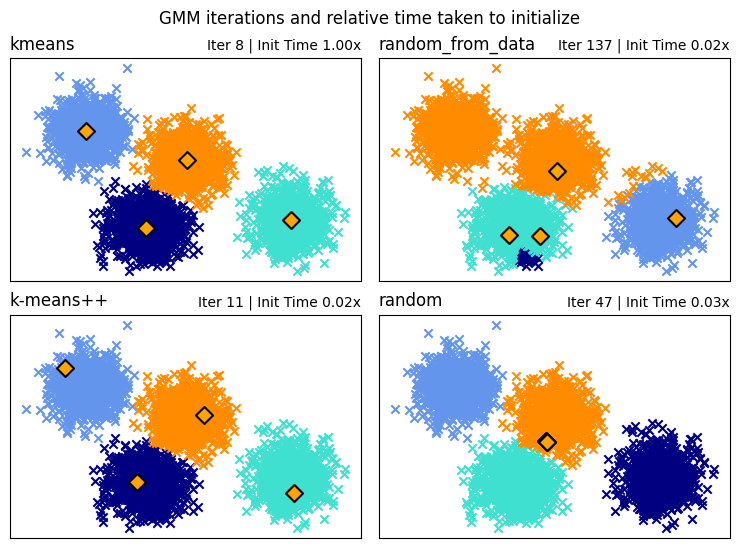

In [3]:
methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}
relative_times = {}

plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    relative_times[method] = times_init[method] / times_init[methods[0]]

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()

# Interpret the results

We can see from the plot that **k-means++** does a good job of both low time to initialize and low number of GaussianMixture iterations to converge. When initialized with **random_from_data** or **random**, the model takes more iterations to converge. All three alternative methods take less time to initialize when compared to **kmeans**.

# Summary

In this lab, we learned about different initialization methods for Gaussian Mixture Models (GMM) and how to use them to cluster sample data using scikit-learn library. We plotted the sample data and initialization centers for each initialization method and interpreted the results.